# Advanced Probability

Topics covered:
- Exchaustive events - Collectively exhaustive events, mutually exchaustive events
- Bayes' theorem
$$P(A|B)=\frac{P(B|A)P(A)}{P(B)}
- Basic Prediction Rules
- Random Variables
  - Discrete
    - Binomial
    - Geometric
    - Poisson
  - Continuous - Standard normal distribution


Here we will do the advanced probability examples. However it seems that they use the Kaggle titanic data but limited to a only a sample of rows and a only some of the columns. What will follow will be some work I do to import the Kaggle titanic data and process it for use with this and future notebooks related to PoDS

In [1]:
import pandas as pd

titanic_data = pd.read_csv("./Kaggle Titanic/train.csv")

In [2]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
titanic_data.drop(columns=['PassengerId','SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked' ], inplace=True)

In [5]:
titanic_data.shape

(891, 5)

In [10]:
titanic_data.to_csv('short_titanic.csv', index=False)

At this point we have done all the processing needed to have the shortened dataset used in the textbook PoDS. only real difference is that instead of survived being 'yes' and 'no' it is instead '1' and '0' which is useful for data science anyway so I will not change it. We will now begin the Titanic example on page 110 of PoDS

In [12]:
titanic = pd.read_csv('short_titanic.csv')

In [13]:
titanic.shape

(891, 5)

In [14]:
titanic.head()

,Survived,Pclass,Name,Sex,Age
0,0,3,"Braund, Mr. Owen Harris",male,22.0
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0
2,1,3,"Heikkinen, Miss. Laina",female,26.0
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0
4,0,3,"Allen, Mr. William Henry",male,35.0


In [15]:
titanic = titanic[['Sex', 'Survived']] #restrict to Sex and Survived columns, this is an alternate way to drop columns

In [16]:
titanic.head() #check to ensure our data has been restricted

,Sex,Survived
0,male,0
1,female,1
2,female,1
3,female,1
4,male,0


In [20]:
num_rows=float(titanic.shape[0])

In [21]:
p_survived=(titanic.Survived==1).sum() / num_rows #interesting that you can use a comparison operator and brackets to return truth value in python

In [22]:
p_notsurvived = 1- p_survived

In [23]:
print( 'rows = ' + str(num_rows))
print( 'prob survived = ' + str(p_survived))
print( 'prob didnt survive = ' + str(p_notsurvived))

rows = 891.0
prob survived = 0.3838383838383838
prob didnt survive = 0.6161616161616161


In [24]:
p_male = (titanic.Sex=='male').sum() / num_rows 
p_female = 1 - p_male 

In [26]:
print('percent male = ' + str(p_male))
print('percent female = ' + str(p_female))

percent male = 0.6475869809203143
percent female = 0.3524130190796857


In [29]:
titanic[titanic.Sex == 'female'].head()

titanic[titanic.Sex == 'female'].shape

(314, 2)

In [31]:
number_of_women = titanic[titanic.Sex == 'female'].shape[0] #passed comparison titanic.Sex == 'female' into brackets of titanic
women_who_lived = titanic[(titanic.Sex =='female') & (titanic.Survived == 1)].shape[0] 
print(number_of_women)
print(women_who_lived)

314
233


In [35]:
p_survived_given_women = women_who_lived / number_of_women

In [36]:
print(p_survived_given_women)

0.7420382165605095


In [37]:
p_survived_given_women = women_who_lived / float(number_of_women)
print(p_survived_given_women)

0.7420382165605095


So the probability a passenger survived given they are female is quite high. Considering the probability of survival altogether is .38, this is quite a stark difference.

Note: I did the following above twice because the book earlier claimed that the standard integer division is sometimes insufficient in python, but it seems to produce th esame result so I'm puzzled by his assertion. I assume he had some issues with this that led to some errors in code or a repeated problems. 

Also I really like that he uses Bayes theorem to show how even a relatively high rate of predicting positives (60% sensitivity) of people who are on drugs with a very high rate (99% of specificity) of an employee not being on drugs being can still lead to a lot of people who are being classified as using drugs who don't use drugs (don't 100% understand this)

In [52]:
import random
def random_variable_of_dice_roll():
    return random.randint(1, 6)#in the book it uses 7 at the top here,but checking documentation, randint meets the top bound, so I have changed this

def trials_function():
    trials = []
    num_trials = 100
    for trial in range(num_trials):
        trials.append( random_variable_of_dice_roll())
    
    print(sum(trials)/float(num_trials))

In [60]:
trials_function()

3.54


Text(0, 0.5, 'Average')

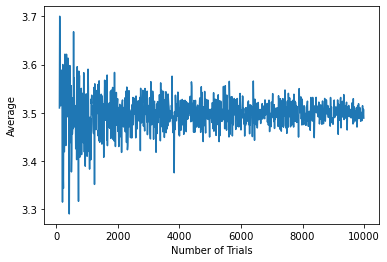

In [61]:
from matplotlib import pyplot as plt

num_trials = range(100, 10000, 10)
avgs = []
for num_trial in num_trials:
    trials=[]
    for trial in range(1, num_trial):
        trials.append( random_variable_of_dice_roll())
    avgs.append(sum(trials)/float(num_trial))

plt.plot(num_trials, avgs)
plt.xlabel('Number of Trials')
plt.ylabel('Average')

Text(0, 0.5, 'Average')

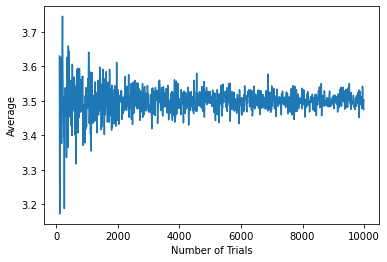

In [62]:
from matplotlib import pyplot as plt
%matplotlib inline
num_trials = range(100, 10000, 10)
avgs = []
for num_trial in num_trials:
    trials=[]
    for trial in range(1, num_trial):
        trials.append( random_variable_of_dice_roll())
    avgs.append(sum(trials)/float(num_trial))

plt.plot(num_trials, avgs)
plt.xlabel('Number of Trials')
plt.ylabel('Average')

In PoDS he describes the variance and standard deviation as give or take variables.

Geometric random variable counts number of trials needed to get one success. So this models finding a job pretty well. Looking at how the model changes when the probability changes can actually model how the job market fluctuates to some degree.

Geometric Probability Mass function
$$P(X=x)=(1-p)^{(x-1)}$$

with 
- Mean: $1/p$ and
- Variance: $(1-p)/p^2$

Poisson distribution is a discrete probability distribution that counts the number of events that occur in a given interval of time. Examples include, 
- finding the probability of having a certain number of visitors on your site within an hour, knowing the past performce of the site.
- estimating the number of car crashes at an intersection based on past police reports.

Poisson probability mass function
$$ P(X=x)=\frac{e^{-\lambda}\lambda^{x}}{x!}$$
with
- mean: $\lambda$, and
- variance: $\lambda$

Most important continuous distribution is the **standard normal distribution**
$$f(x) = \frac{1}{\sqrt{2\pi\sigma^2}}e^\frac{(x-\mu)^2}{2\sigma^2}$$

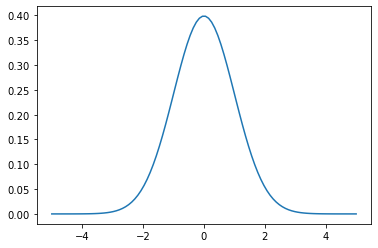

In [77]:
def normal_pdf(x, mu=0, sigma=1):
    return (1./np.sqrt(2*3.14159*sigma**2)) * np.exp((-(x-mu)**2/(2.*sigma**2)))

x_values = np.linspace(-5,5, 100) #what is the 100? changed to 5 and my graph was really blocky, so perhaps its # of points plotted
y_values = [normal_pdf(x) for x in x_values]

plt.plot(x_values, y_values)